In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [11]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA if necessary
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


In [12]:
# Handle missing values if necessary
df.fillna(df.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Optionally, apply PCA to reduce dimensions if dataset is large
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


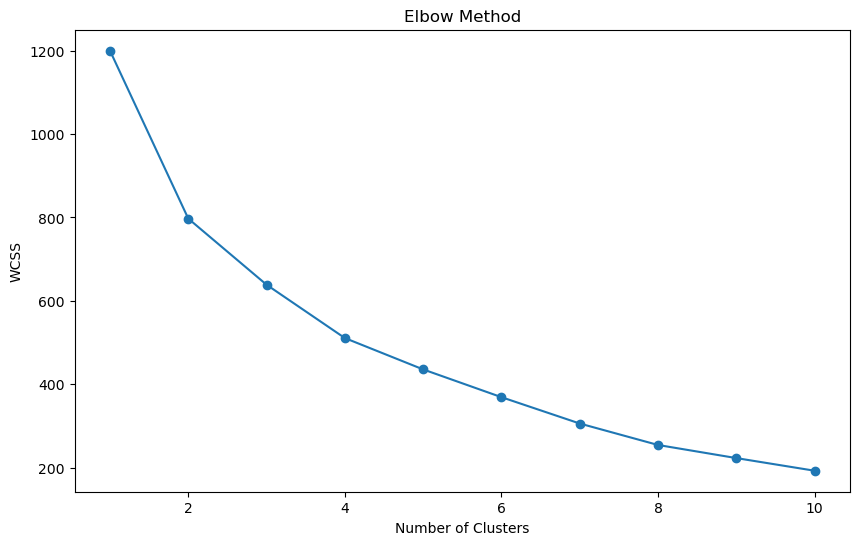

In [13]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


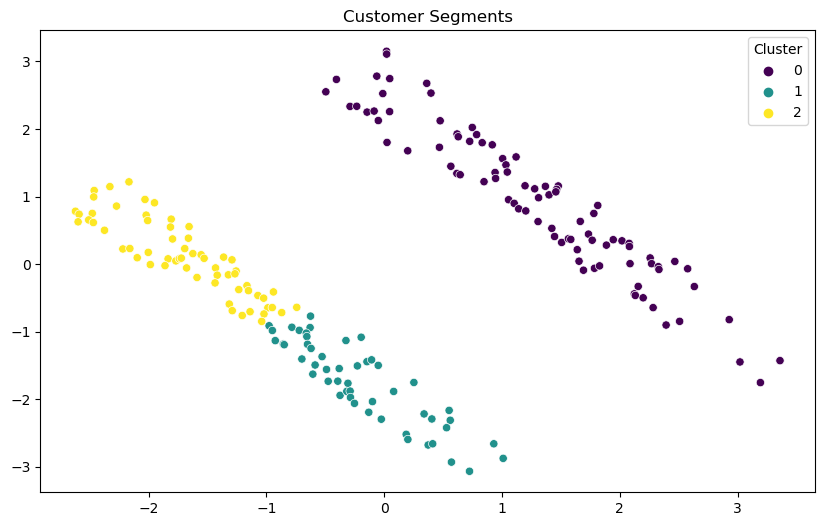

Silhouette Score for k-Means: 0.2919675963808926


In [14]:
# Apply k-Means clustering
optimal_clusters = 3  # Replace with the number determined by the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.show()

# Silhouette Score for k-Means
silhouette_kmeans = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score for k-Means: {silhouette_kmeans}')


In [15]:
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
df['Cluster_Agglo'] = agglo.fit_predict(df_scaled)

# Silhouette Score for Agglomerative Clustering
silhouette_agglo = silhouette_score(df_scaled, df['Cluster_Agglo'])
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')


Silhouette Score for Agglomerative Clustering: 0.29413458137857573


In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Silhouette Score for DBSCAN
# Note: Silhouette score for DBSCAN may not be meaningful if there are too many noise points
try:
    silhouette_dbscan = silhouette_score(df_scaled, df['Cluster_DBSCAN'])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
except:
    print("Silhouette Score for DBSCAN: Not applicable (too many noise points)")


Silhouette Score for DBSCAN: -0.14547593596098055


In [17]:
# Compare the Silhouette Scores
print(f"Silhouette Score for k-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan if 'silhouette_dbscan' in locals() else 'Not applicable'}")

# Based on the comparison, choose the best algorithm


Silhouette Score for k-Means: 0.2919675963808926
Silhouette Score for Agglomerative Clustering: 0.29413458137857573
Silhouette Score for DBSCAN: -0.14547593596098055
